<a href="https://colab.research.google.com/github/wasimshoman/NY_Taxi/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
from math import radians, sin, cos, sqrt, asin
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt


In [96]:
#CSV_file= pd.read_csv('/content/NYC_trip.csv')
#drive.mount('/content/drive')
DRIVE_PATH = '/content/drive/MyDrive/Taxi_proj'
FILE_PATH = f"{DRIVE_PATH}/NYC_trip.csv"

DF_file= pd.read_csv(FILE_PATH)
print(DF_file.shape)

(1458644, 11)


In [97]:
DF_file.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [98]:
# unrelated column to the purpose of the project
DF_file.drop(['id'], axis=1, inplace=True)

In [99]:
DF_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 111.3+ MB


In [100]:

# calculte the straight line distance in KM between the pickup and dropoff points
# the coordinates are represented in WGS 84
# the coordinate is geodiosic meaning that they are shown in decimal degrees
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two points
    on the earth (specified in decimal degrees) using the Haversine formula.
    Returns the distance in kilometers.
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2

    # Earth's radius in kilometers
    R = 6371

    # Calculate the distance
    c = 2 * asin(sqrt(a))
    km = R * c
    return km

# We use np.vectorize for faster application across the entire DataFrame
# by converting the columns to NumPy arrays first.

try:
    # 1. Extract the coordinate arrays
    pickup_lon = DF_file['pickup_longitude'].values
    pickup_lat = DF_file['pickup_latitude'].values
    dropoff_lon = DF_file['dropoff_longitude'].values
    dropoff_lat = DF_file['dropoff_latitude'].values

    # 2. Vectorize the Haversine function for performance
    vectorized_haversine = np.vectorize(haversine)

    # 3. Apply the vectorized function and create the new column
    DF_file['Distance_KM'] = vectorized_haversine(
        pickup_lon, pickup_lat, dropoff_lon, dropoff_lat
    )

    print(DF_file['Distance_KM'].head())

except KeyError as e:
    print(f"Error: Missing column in DF_file. Please ensure your DataFrame has the column: {e}")
    print("The required columns are: 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'")
except Exception as e:
    print(f"An unexpected error occurred during calculation: {e}")


0    1.498521
1    1.805507
2    6.385098
3    1.485498
4    1.188588
Name: Distance_KM, dtype: float64


In [104]:
DF_file['store_and_fwd_flag'].head()

,store_and_fwd_flag
0,N
1,N
2,N
3,N
4,N


In [106]:
DF_file['store_and_fwd_flag_V'] = DF_file['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
DF_file['store_and_fwd_flag_V'].head()
DF_file.drop(['store_and_fwd_flag'], axis=1, inplace=True)

In [107]:
# check null values
DF_file.isnull().sum()

,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
trip_duration,0
Distance_KM,0


In [108]:
# check duplicated rows
DF_file.duplicated().sum()

np.int64(7)

In [110]:
DF_file.drop_duplicates(inplace=True)

In [88]:
# identify the unique values for each column
unique_counts = DF_file.nunique().sort_values(ascending=False)
print (unique_counts)

Distance_KM           1452288
dropoff_datetime      1380377
pickup_datetime       1380222
dropoff_latitude        62519
pickup_latitude         45245
dropoff_longitude       33821
pickup_longitude        23047
trip_duration            7417
passenger_count            10
vendor_id                   2
store_and_fwd_flag          2
dtype: int64


In [89]:
DF_file['passenger_count'].value_counts()

,count
passenger_count,
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404
0,60
7,3
9,1


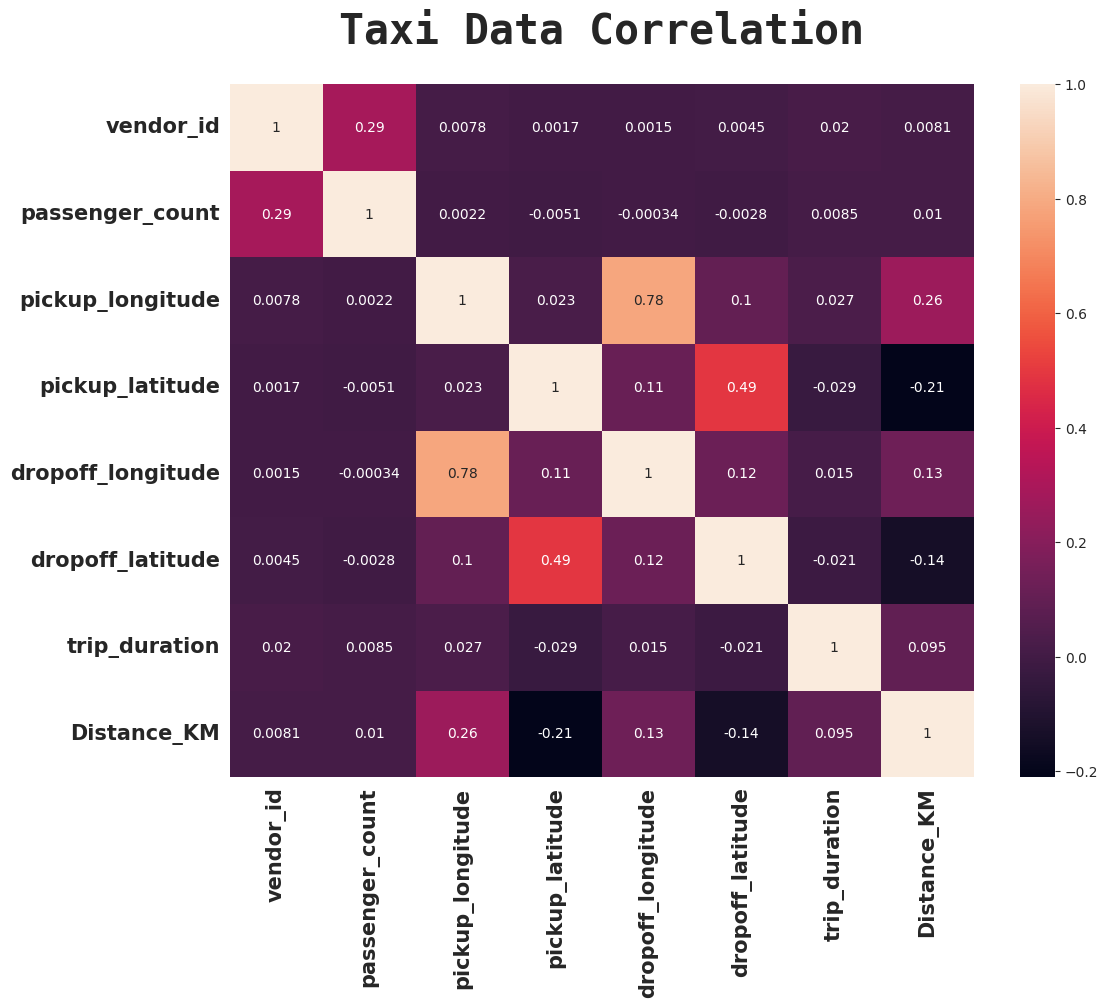

In [90]:
#check for correlation between numeric columns
numeric_columns = DF_file.select_dtypes(include=['float64', 'int64']).columns
sns.set_style("whitegrid") # set the seaborn style
plt.figure(figsize=(12, 9)) # figure the size
sns.heatmap(DF_file[numeric_columns].corr(), annot=True) # create a heatmap
plt.title("Taxi Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

In [91]:
# Let's see the correlation clearly
(DF_file[numeric_columns].corr()["trip_duration"] # transform it into data corr
      .sort_values(ascending=False) # sort the values
      .to_frame() # change it into data frame
      .T) # transpose

,trip_duration,Distance_KM,pickup_longitude,vendor_id,dropoff_longitude,passenger_count,dropoff_latitude,pickup_latitude
trip_duration,1.0,0.094777,0.026542,0.020304,0.014678,0.008471,-0.020677,-0.029204


In [111]:
object_columns =DF_file.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f'{col}: {DF_file[col].nunique()}')
    print(f'{col}: {DF_file[col].unique()}', end='\n\n')

pickup_datetime: 1380222
pickup_datetime: ['2016-03-14 17:24:55' '2016-06-12 00:43:35' '2016-01-19 11:35:24' ...
 '2016-01-10 07:35:15' '2016-04-22 06:57:41' '2016-01-05 15:56:26']

dropoff_datetime: 1380377
dropoff_datetime: ['2016-03-14 17:32:30' '2016-06-12 00:54:38' '2016-01-19 12:10:48' ...
 '2016-04-22 07:10:25' '2016-01-05 16:02:39' '2016-04-05 14:47:43']



In [112]:
# Extract start time and end time
DF_file['pickup_hour'] = pd.to_datetime(DF_file['pickup_datetime']).dt.hour
DF_file['pickup_day'] = pd.to_datetime(DF_file['pickup_datetime']).dt.day
DF_file['pickup_month'] = pd.to_datetime(DF_file['pickup_datetime']).dt.month
DF_file.drop('pickup_datetime', axis=1, inplace=True)

DF_file['dropoff_hour'] = pd.to_datetime(DF_file['dropoff_datetime']).dt.hour
DF_file['dropoff_day'] = pd.to_datetime(DF_file['dropoff_datetime']).dt.day
DF_file['dropoff_month'] = pd.to_datetime(DF_file['dropoff_datetime']).dt.month
DF_file.drop('dropoff_datetime', axis=1, inplace=True)


In [114]:
DF_file.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1, inplace=True)
DF_file.head()

,vendor_id,passenger_count,trip_duration,Distance_KM,store,store_and_fwd_flag_V,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,2,1,455,1.498521,0,0,17,14,3,17,14,3
1,1,1,663,1.805507,0,0,0,12,6,0,12,6
2,2,1,2124,6.385098,0,0,11,19,1,12,19,1
3,2,1,429,1.485498,0,0,19,6,4,19,6,4
4,2,1,435,1.188588,0,0,13,26,3,13,26,3


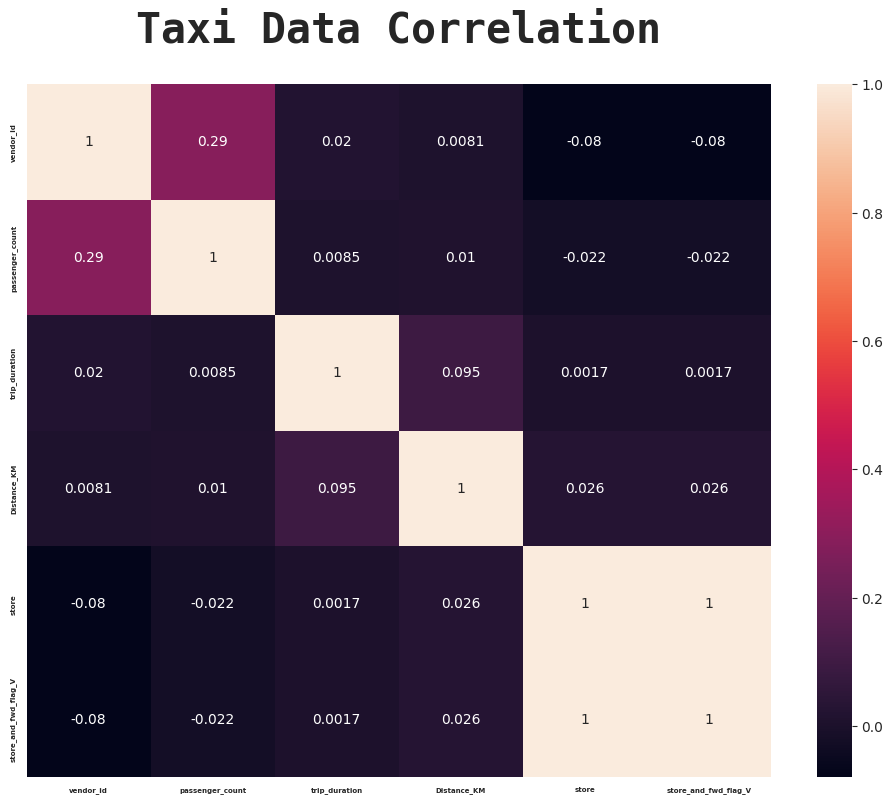

In [116]:
#check for correlation between numeric columns
numeric_columns = DF_file.select_dtypes(include=['float64', 'int64']).columns
sns.set_style("whitegrid") # set the seaborn style
plt.figure(figsize=(12, 9)) # figure the size
sns.heatmap(DF_file[numeric_columns].corr(), annot=True) # create a heatmap
plt.title("Taxi Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30) # title
plt.xticks(weight="bold", fontsize=5) # x-ticks
plt.yticks(weight="bold", fontsize=5); # y-ticks